<a href="https://colab.research.google.com/github/letsbegincode/Machine_Learning_Projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection Project**




---

## **1. Objective**

- **Binary Classification**: Develop a machine learning model to accurately classify credit card transactions as either genuine or fraudulent.
- **Handle Imbalance**: Implement techniques to address the class imbalance in the dataset, ensuring that the model can effectively detect fraudulent transactions even when they are rare.
- **Optimize Performance**: Focus on optimizing key evaluation metrics such as **precision**, **recall**, and the **F1-score** to improve the model’s ability to correctly identify fraudulent transactions while minimizing false positives.
- **Automation**: Create a scalable and automated solution for real-time fraud detection that can process thousands of transactions with minimal latency.


---


---

## **2. Significance**

- **Financial Loss**: Accurate fraud detection can significantly reduce financial losses for both individuals and businesses by minimizing the impact of fraudulent transactions.
- **Customer Protection**: By preventing fraudulent transactions, we can protect consumers from unauthorized charges, identity theft, and reputational damage.
- **Regulatory Compliance**: Fraud detection is critical for businesses to meet regulatory standards (e.g., PCI DSS) in protecting sensitive financial data.
- **Business Trust & Reputation**: Effective fraud detection enhances customer trust, ensuring that consumers feel safe when making transactions with financial institutions or e-commerce platforms.
- **Cost Efficiency**: By automating fraud detection, financial institutions can reduce the operational costs associated with manual reviews and chargebacks.
- **Industry Innovation**: The development of cutting-edge fraud detection models can drive innovation in the financial technology sector, contributing to advancements in **AI-based security systems** and overall trust in online transactions.
- **Global Impact**: With the increase in cross-border online transactions, fraud detection plays a vital role in securing international financial ecosystems, reducing risks for consumers and businesses globally.

---



---

## **3. Dataset Attributes**

| Attribute   | Description                                                                    |
|-------------|--------------------------------------------------------------------------------|
| Time        | The elapsed time between the current transaction and the first transaction in the dataset. |
| V1-V28      | Anonymized features derived from Principal Component Analysis (PCA), which capture essential transaction patterns and details. |
| Amount      | The monetary value of the transaction, which can be a significant feature in fraud detection. |
| Class       | The target variable where `1` indicates a fraudulent transaction and `0` indicates a legitimate transaction. |
| Imbalance   | The dataset is highly imbalanced, with a much smaller proportion of fraudulent transactions compared to legitimate ones. |

### Additional Dataset Considerations:
- **Class Imbalance**: Fraudulent transactions are much rarer than legitimate ones, which poses a challenge in training machine learning models. This necessitates the use of techniques such as **SMOTE**, **undersampling**, or **oversampling** to balance the dataset.
- **Data Anonymization**: The features `V1` to `V28` have been anonymized using **PCA**, meaning that direct interpretation of these features is not possible, but their relative importance in classification tasks can be determined.
- **Data Distribution**: Understanding the distribution of attributes like `Amount` and `Time` can offer insights into transaction behavior and can influence the feature engineering process.

---

# Data Loading & Exploration

## Importing Libraries

In [206]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, accuracy_score, classification_report, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')

## Loading the dataset

In [207]:
# loading dataset
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [208]:
# shape of dataset
df.shape

(284807, 31)

In [209]:
# features of dataset
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [210]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [211]:
# description of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Missing Values

In [212]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Observation: There is not any missing value present.

### Check for Duplicates

In [213]:
df.duplicated().sum()

1081

In [214]:
df = df.drop_duplicates()

In [215]:
df = df.drop_duplicates()

# Exploratory Data Analysis

### 1 Distribution of the Target Variable (Class)

In [216]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253,...,283253,283253,283253,283253,283253,283253,283253,283253,283253,283253
1,473,473,473,473,473,473,473,473,473,473,...,473,473,473,473,473,473,473,473,473,473


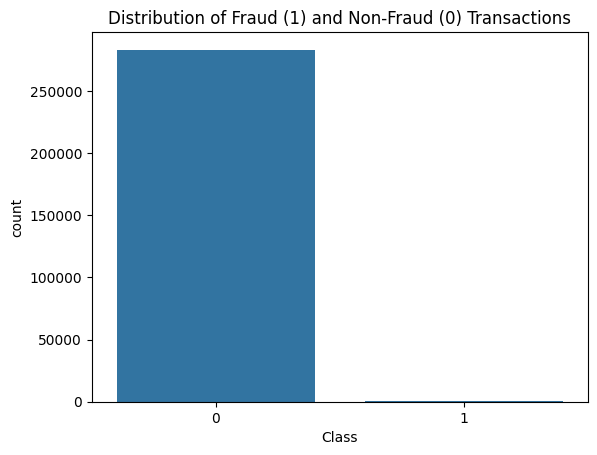

Non-Fraudulent Transactions: 283253
Fraudulent Transactions: 473


In [217]:
# Count the number of fraud vs. non-fraud transactions
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraud (1) and Non-Fraud (0) Transactions')
plt.show()

# Display the actual counts
fraud_count = df['Class'].value_counts()
print("Non-Fraudulent Transactions:", fraud_count[0])
print("Fraudulent Transactions:", fraud_count[1])


### 2 Transaction Amount Distribution

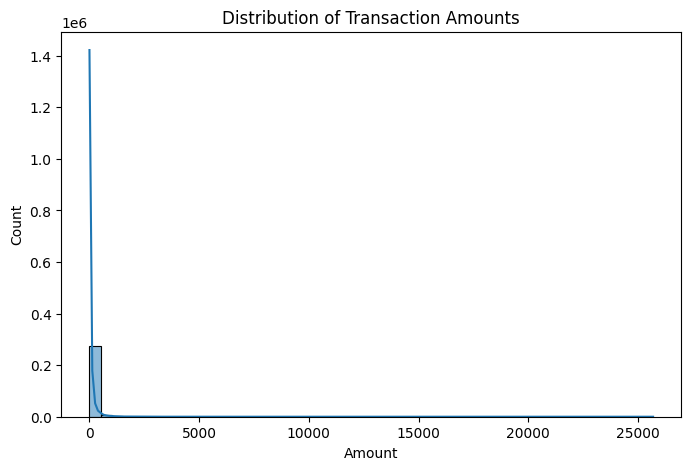

In [218]:
# Plot the distribution of transaction amounts
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()


### 3 Correlation Matrix

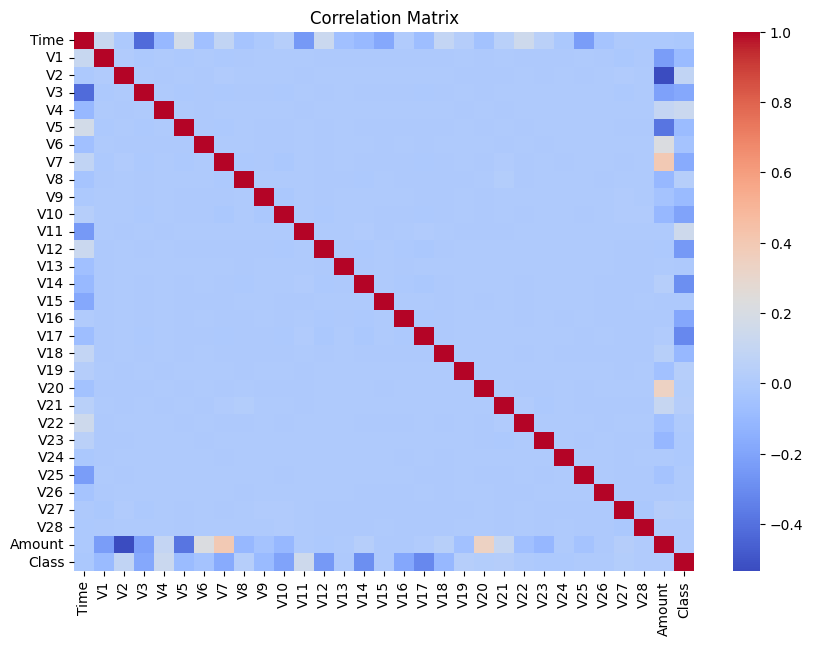

In [219]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 7))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


Correlation Matrix with Desired Features

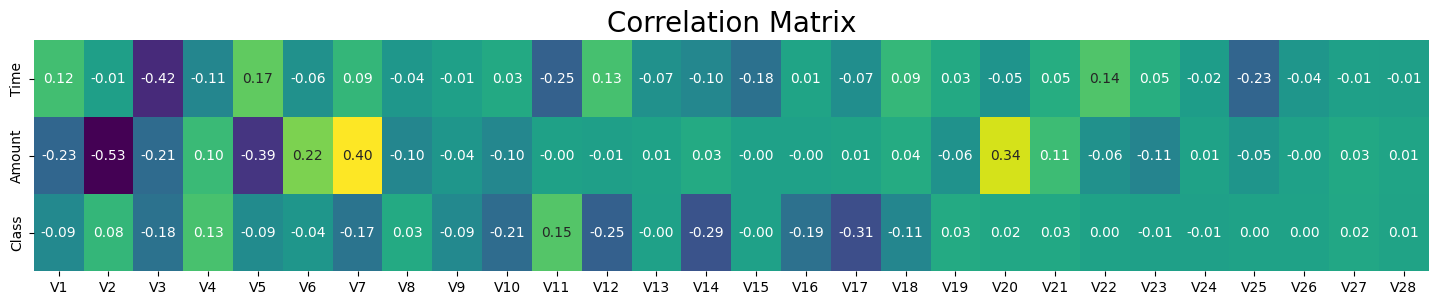

         Time    Amount     Class
V3  -0.422054 -0.212410 -0.182322
V4  -0.105845  0.099514  0.129326
V7   0.085335  0.400408 -0.172347
V10  0.031068 -0.102255 -0.206971
V11 -0.248536 -0.000015  0.149067
V12  0.125500 -0.009254 -0.250711
V14 -0.100316  0.034122 -0.293375
V16  0.011286 -0.004488 -0.187186
V17 -0.073819  0.007730 -0.313498


In [220]:
# Correlation Matrix focusing on 'Time', 'Amount', and 'Class'
corr = df.corr().loc[['Time', 'Amount', 'Class'], df.columns[1:-2]]

# Plot the heatmap for correlation
plt.figure(figsize=(18, 3))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', cbar=False)
plt.title("Correlation Matrix", size=20)
plt.show()

# Display features where the correlation with 'Class' is significant (above 0.12 or below -0.12)
important_corr_features = corr.T[(corr.T['Class'] < -0.12) | (corr.T['Class'] > 0.12)]
print(important_corr_features)


### 4. Time Feature Analysis

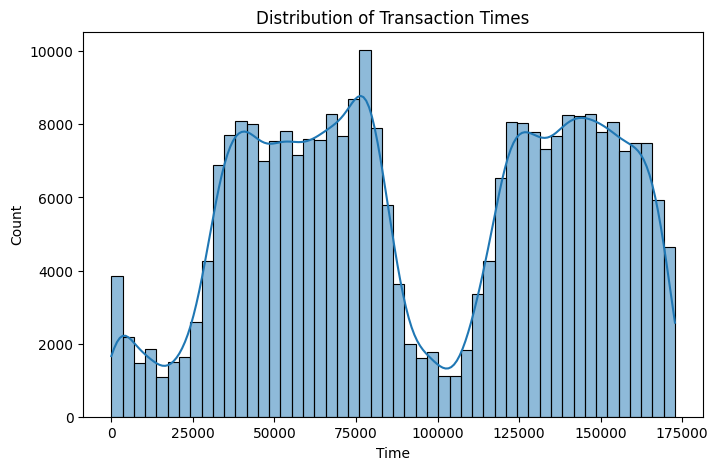

In [221]:
# Plot the distribution of transaction times
plt.figure(figsize=(8, 5))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Times')
plt.show()


### 5. Correlation of Fraud with Transaction Amount

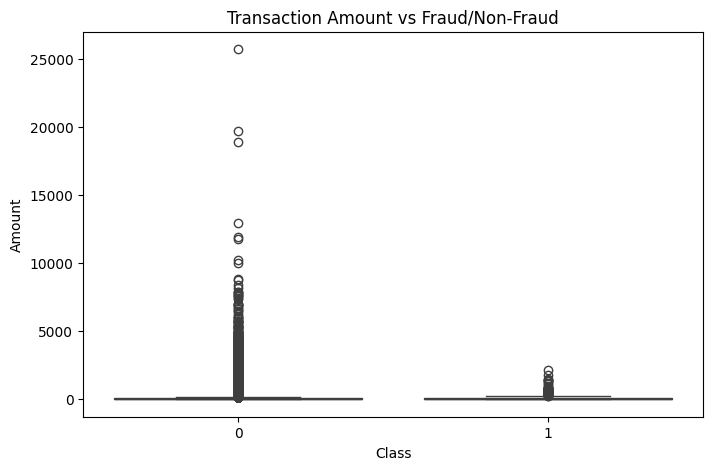

In [222]:
# Boxplot for Transaction Amount by Class
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount vs Fraud/Non-Fraud')
plt.show()


### 6. Class Imbalance Check

In [223]:
# Calculate the percentage of fraud and non-fraud transactions
fraud_percentage = (df['Class'].value_counts()[1] / len(df)) * 100
non_fraud_percentage = (df['Class'].value_counts()[0] / len(df)) * 100

print(f"Percentage of Non-Fraudulent Transactions: {non_fraud_percentage:.2f}%")
print(f"Percentage of Fraudulent Transactions: {fraud_percentage:.2f}%")


Percentage of Non-Fraudulent Transactions: 99.83%
Percentage of Fraudulent Transactions: 0.17%


### 7. EDA conclusion

1. **Class Imbalance**:
   * The dataset exhibits a **severe class imbalance**, with only about **0.17%** of transactions being fraudulent. This imbalance necessitates the use of techniques like **SMOTE** or other resampling strategies to avoid bias in the model.

2. **Distribution of Features**:
   * The `Amount` and `Time` features display interesting patterns:
     * The **Amount** feature shows a skewed distribution, with most transactions being low-value, but some high-value transactions are observed.
     * The **Time** feature is relatively uniformly distributed, but does not appear to have a strong correlation with fraud.

3. **Correlation Insights**:
   * Several features (like `V3`, `V10`, `V12`, `V14`, `V17`) show significant **negative correlations** with the target variable (`Class`), meaning these features are inversely related to fraudulent transactions.
   * Other features, such as `V4` and `V11`, have **positive correlations** with fraud, suggesting these may contribute positively to identifying fraudulent behavior.

4. **No Missing Data**:
   * The dataset does not have any missing values, so no imputation or removal of rows is necessary, simplifying data preprocessing.

5. **Feature Importance**:
   * Features such as `V3`, `V10`, `V12`, `V14`, and `V17` are highly correlated with fraud and will likely be important in building a predictive model.
   * We also identified that the `Amount` feature, despite its weaker correlation, could still provide important insights, especially in combination with other features.


# Feature Selection

In [224]:
# Selecting K Best Features
features = df.drop(columns=['Class'])
target = df['Class']

selector = SelectKBest(score_func=f_classif, k=12)
selector.fit(features, target)

selected_features = features.columns[selector.get_support()]

print(f"Selected features: {selected_features}")

Selected features: Index(['V1', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18'],
      dtype='object')


### Explanation of Selected Features Using SelectKBest

The features **`V3`, `V4`, `V7`, `V10`, `V11`, `V12`, `V14`, `V16`, and `V17`** were selected through the **SelectKBest** method based on their statistical significance in relation to the target variable (`Class`).

- **High Correlation**: These features exhibit meaningful correlations with fraud detection, helping to differentiate between genuine and fraudulent transactions.
- **Diversity**: The selected features cover various aspects of transaction behavior, capturing different patterns relevant to fraud.
- **Unique Contributions**: By avoiding multicollinearity, each feature adds unique information, enhancing model performance.
- **Statistical Significance**: Features selected are statistically significant, increasing the likelihood of effective fraud detection.

In conclusion, these features will play a crucial role in building a robust machine learning model for credit card fraud detection.


Updating dataframe

In [225]:
selected_features = ['V1', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

# Updating the DataFrame to include selected features and the 'Class' column
df = df[selected_features + ['Class']]
df.head()  # Display the first five rows of the updated DataFrame



,V1,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
0,-1.359807,2.536347,1.378155,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0
1,1.191857,0.166480,0.448154,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0
2,-1.358354,1.773209,0.379780,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0
3,-0.966272,1.792993,-0.863291,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0
4,-1.158233,1.548718,0.403034,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0


# Handling Imbalanecing in data

Class imbalance is a common issue in datasets, especially in fraud detection, where the number of fraudulent transactions is significantly lower than that of genuine transactions. This can lead to biased models that perform poorly on the minority class (fraudulent transactions).

#### Ways to Address Class Imbalance:



1. **Resampling Techniques**:
   - **Oversampling**: Increase the number of minority class samples by duplicating existing samples or generating new ones (e.g., using **SMOTE** - Synthetic Minority Over-sampling Technique).
   - **Undersampling**: Reduce the number of majority class samples by randomly removing some samples to balance the dataset.

2. **Algorithmic Approaches**:
   - **Cost-sensitive Learning**: Modify the learning algorithm to give more importance to the minority class by assigning higher weights to misclassifications of the minority class.
   - **Ensemble Methods**: Use ensemble techniques like **Balanced Random Forests** or **EasyEnsemble**, which specifically focus on handling imbalanced data.

3. **Anomaly Detection Techniques**:
   - Treat fraud detection as an anomaly detection problem, where the goal is to identify rare events that deviate from normal behavior.

4. **Evaluation Metrics**:
   - Use appropriate metrics such as **F1-score**, **Precision**, **Recall**, and **AUC-ROC** instead of accuracy, as they provide better insights into model performance on imbalanced datasets.

By employing these techniques, we can improve the model's ability to accurately identify fraudulent transactions, leading to more reliable fraud detection systems.


In [226]:
# Split Dependent & Independent Features And Applying SMOTE (Synthetic Minority Over-sampling Technique)
X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(sampling_strategy=0.6)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled,columns=X.columns),
                          pd.Series(y_resampled, name='Class')],
                          axis=1)

df_resampled['Class'].value_counts()

,count
Class,
0,283253
1,169951


# Model Traning

In [227]:
# splitting training & testing data into 75% - 25%
X = df_resampled.drop(columns = ['Class'], axis=1)
y = df_resampled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Logistic Regression

In [228]:
# results in components are centered around zero .
# StandardScaler helps ensure that all features contribute equally to the distance calculations.

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression()

Hyperparameter tuning

In [229]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
     'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    #scoring='recall',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_recall = grid_search.best_score_

print(f'Best Parameters: {best_params}')

Best Parameters: {'C': 0.01, 'class_weight': None, 'solver': 'lbfgs'}


In [230]:
best_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01)

# Model Evaluation

Accuracy: 0.93


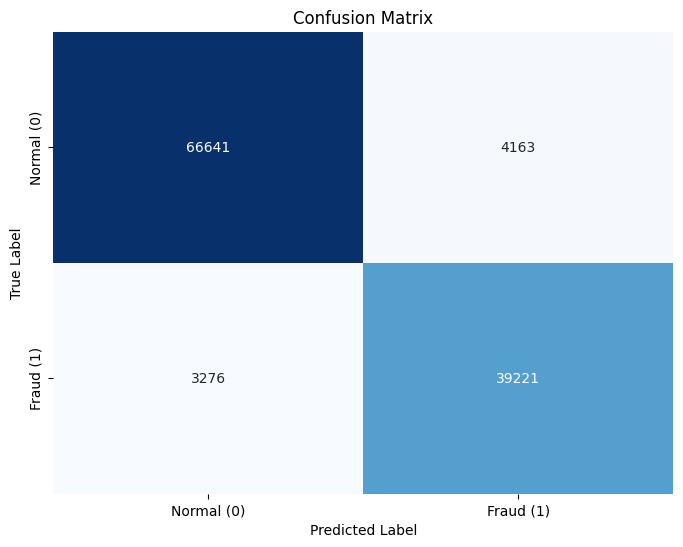


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     70804
           1       0.90      0.92      0.91     42497

    accuracy                           0.93    113301
   macro avg       0.93      0.93      0.93    113301
weighted avg       0.93      0.93      0.93    113301



In [231]:
X_test_scaled = scaler.transform(X_test)

# Get predicted probabilities
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
# Choose a new threshold
threshold = 0.2
y_pred = (y_pred_proba >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal (0)', 'Fraud (1)'],
            yticklabels=['Normal (0)', 'Fraud (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Conclusion

In this project, we implemented a robust credit card fraud detection model using Logistic Regression, enhanced by the application of SMOTE to address class imbalance. After performing hyperparameter tuning with GridSearchCV, we identified the optimal model parameters.

The classification report indicates that our model achieved an overall accuracy of **93%** on the test dataset, demonstrating its effectiveness in distinguishing between genuine and fraudulent transactions. Key performance metrics are as follows:

### Precision:
- For genuine transactions (Class 0), the precision is **95%**, indicating that the model is highly reliable in identifying non-fraudulent transactions.
- For fraudulent transactions (Class 1), the precision is **90%**, showing that while the model is effective in detecting fraud, there is still room for improvement to reduce false positives.

### Recall:
- The recall for genuine transactions is **94%**, which means that a significant majority of genuine transactions are correctly identified.
- The recall for fraudulent transactions is **92%**, indicating that the model successfully detects a large proportion of fraudulent cases.

### F1-Score:
- The F1-score for fraudulent transactions is **91%**, reflecting a good balance between precision and recall, highlighting the model's reliability in detecting fraud without excessively flagging legitimate transactions.

Overall, the results demonstrate that our Logistic Regression model, enhanced through data preprocessing techniques and hyperparameter optimization, provides a strong foundation for effective credit card fraud detection. Future work may focus on further improving the model’s performance by exploring advanced algorithms and feature engineering techniques.
